In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
data_train = pd.read_csv("/Users/simonlv/workspace/kaggle/titanic/data/train.csv")
print data_train

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe()

/Library/Python/2.7/site-packages/numpy-1.11.1-py2.7-macosx-10.11-intel.egg/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 乘客各属性分布
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha = 0.2)

[None]

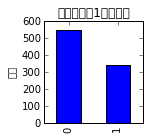

In [6]:
plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"获救情况（1为获救）")
plt.ylabel(u"人数")

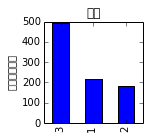

In [7]:
plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title(u"人数")
plt.ylabel(u"乘客等级分布")

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


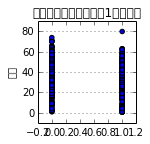

In [8]:
plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")
plt.grid(b=True, which='major', axis='y')
plt.title(u"按照年龄看获救分布（1为获救）")

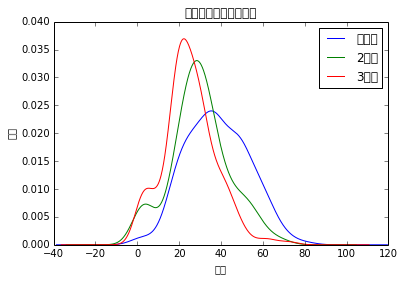

In [9]:
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u"头等舱", u'2等舱', u'3等舱'), loc='best')

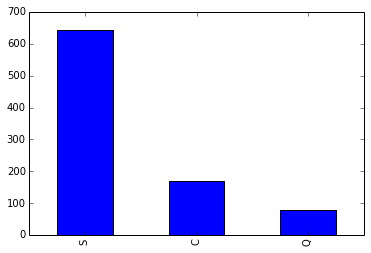

In [10]:
data_train.Embarked.value_counts().plot(kind='bar')

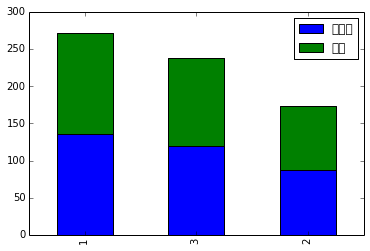

In [11]:
Surviced_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Surviced_0
Surviced_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Surviced_1, u'未获救':Surviced_1})
df.plot(kind='bar', stacked=True)

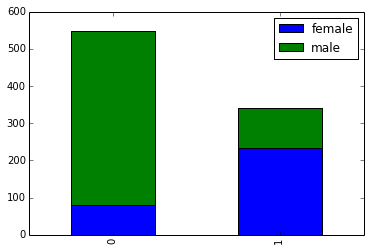

In [12]:
Surviced_m = data_train.Survived[data_train.Sex == "male"].value_counts()
Surviced_f = data_train.Survived[data_train.Sex == "female"].value_counts()
df = pd.DataFrame({u'male':Surviced_m, u'female':Surviced_f})
df.plot(kind='bar', stacked=True)

In [13]:
from sklearn.ensemble import RandomForestRegressor
# 使用RandomForestRegressor填补缺失的年龄属性
def set_missing_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    y = known_age[:, 0]
    x = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x, y)
    predictedAges = rfr.predict(unknown_age[:, 1:])
#     print predictedAges
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    return df, rfr
data_train, rfr = set_missing_ages(data_train)

In [14]:
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df
data_train = set_Cabin_type(data_train)

In [15]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix = 'Sex')
dummies_pClass = pd.get_dummies(data_train['Pclass'], prefix = 'Pclass')
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_pClass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,38.000000,1,0,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,1,35.000000,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,5,0,35.000000,0,0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,6,0,23.828953,0,0,8.4583,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,7,0,54.000000,0,0,51.8625,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7,8,0,2.000000,3,1,21.0750,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9,1,27.000000,0,2,11.1333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,10,1,14.000000,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
# scaling
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df

/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.561363,-0.502445
1,2,1,38.000000,1,0,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.613182,0.786845
2,3,1,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.267727,-0.488854
3,4,1,35.000000,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.392955,0.420730
4,5,0,35.000000,0,0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.392955,-0.486337
5,6,0,23.828953,0,0,8.4583,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.427102,-0.478116
6,7,0,54.000000,0,0,51.8625,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.787727,0.395814
7,8,0,2.000000,3,1,21.0750,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-2.029545,-0.224083
8,9,1,27.000000,0,2,11.1333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.194318,-0.424256
9,10,1,14.000000,1,0,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.148636,-0.042956


In [17]:
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_df
train_np = train_df.as_matrix()

y = train_np[:, 0]
x = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [18]:
data_test = pd.read_csv("/Users/simonlv/workspace/kaggle/titanic/data/test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test

/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.307535,-0.496637
1,893,47.000000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.256230,-0.511497
2,894,62.000000,0,0,9.6875,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.394665,-0.463335
3,895,27.000000,0,0,8.6625,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.261683,-0.481704
4,896,22.000000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.641161,-0.416740
5,897,14.000000,0,0,9.2250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.248326,-0.471623
6,898,30.000000,0,0,7.6292,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.033996,-0.500221
7,899,26.000000,1,1,29.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.337578,-0.117238
8,900,18.000000,0,0,7.2292,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.944743,-0.507390
9,901,21.000000,2,0,24.1500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.717056,-0.204154


In [19]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [20]:
pd.DataFrame({"columns":list(train_df.columns)[1:], 'coef':list(clf.coef_.T)})

,coef,columns
0,[-0.34422847053],SibSp
1,[-0.104930610415],Parch
2,[0.0],Cabin_No
3,[0.902140289601],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417257077024],Embarked_S
7,[1.95656622615],Sex_female
8,[-0.67743006221],Sex_male
9,[0.341152203973],Pclass_1


In [21]:
from sklearn import cross_validation

 #简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print cross_validation.cross_val_score(clf, X, y, cv=5)

[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


In [22]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv("/Users/simonlv/workspace/kaggle/titanic/data/Train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


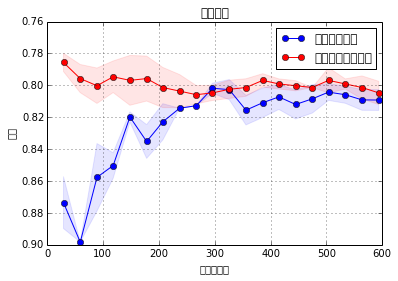

(0.80656968448540245, 0.018258876711338634)

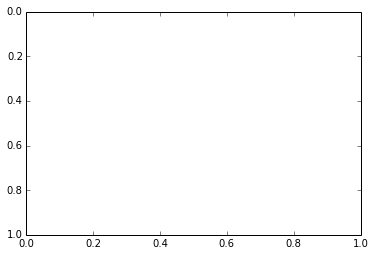

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y)

In [24]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})